In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import model functions from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

## Data Initial Setup

In [2]:
# Reading the given data file in pandas dataframe
customers = pd.read_csv('../Data/customers.csv')
# Check the data
customers.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [3]:
# Getting some statistical information about the data features
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18769.0,9382.049710,5418.203513,1.0,4690.000,9382.000,14074.00,18766.00
LIMIT,18769.0,168275.543716,129405.294386,10000.0,50000.000,140000.000,240000.00,800000.00
BALANCE,18769.0,9119.887343,13045.368642,0.0,640.325,3959.025,11975.25,130692.45
INCOME,18769.0,177765.809100,143092.431648,10000.0,56494.000,148225.000,256826.00,908846.00
RATING,18769.0,0.219244,0.413746,0.0,0.000,0.000,0.00,1.00
GENDER,18769.0,0.618307,0.485815,0.0,0.000,1.000,1.00,1.00
EDUCATION,18756.0,1.789934,0.732326,0.0,1.000,2.000,2.00,3.00
MARITAL,18731.0,1.514922,0.519588,0.0,1.000,2.000,2.00,2.00
AGE,18769.0,35.578614,9.556397,-1.0,28.000,34.000,41.00,199.00
S1,18769.0,0.128776,0.954745,-1.0,0.000,0.000,0.00,7.00


In [4]:
# Printing information about the features in dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

## List the categorical and numeric variables in this dataset.

**Observation**

From the Data Dictionary of the data, we can see that there are some variables which have different classes in them. Numeric symbols are used to depict the values of those categories. So, we can call them as the categorical variables. We can display them seperately. The variables which behaves as the category are listed below:

In [5]:
# Defining the categorical variables
categorical_variables = ['GENDER', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5', 'RATING']
# Defining the numerical variables
numeric_variables = [variable for variable in customers.columns if variable not in categorical_variables]

print(f"Categorical Variables:\n{categorical_variables}\n")
print(f"Numeric Variables:\n{numeric_variables}")

Categorical Variables:
['GENDER', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5', 'RATING']

Numeric Variables:
['ID', 'LIMIT', 'BALANCE', 'INCOME', 'AGE', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']


---

## 

# Data Preprocessing for analysis

Now, we will conduct four (4) data pre-processing tasks for the analysis of the data, explaining results obtained.

let's check the data again which we have.

In [6]:
customers.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


Are there any missing values?

In [7]:
customers.isna().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

**Observation**

We see that there are two variables which have some missing values. We have to deal with the missing values.

## Data pre-processing Task 1 - Dealing with Missing Values

We have to take a look for missing data fields or blank spaces (if any). This makes our data incomplete. We have to perform necessary stepts to deal with the missing values. 

Let's check which values are occured most of the times in the variables that contain the missing values

In [8]:
# Checking the Education variable
customers['EDUCATION'].value_counts()   

2.0    8872
1.0    6411
3.0    3139
0.0     334
Name: EDUCATION, dtype: int64

In [9]:
# Checking the Marital variable
customers['MARITAL'].value_counts()

2.0    9834
1.0    8708
0.0     189
Name: MARITAL, dtype: int64

**Observation**

We see that we do not have excessively large number of samples in our data. So instead of dropping the samples with missing values, we can deal these values by filling them with the values which occured most of the times in a variable column

In [10]:
# Filling the blank values with the most occured value in a column
customers['EDUCATION'].fillna(value = 2.0, inplace=True)
customers['MARITAL'].fillna(value = 2.0, inplace=True);

In [11]:
# Checking the updated length of concerned variables
len(customers.EDUCATION), len(customers.MARITAL)

(18769, 18769)

In [12]:
# Check whether there are still any missing values or not
customers.isna().sum()

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

**Observation**

Now our data frame does not contain any missing values

## Data pre-processing Task 2 - Removing Duplicated Data
There are some of the record which are duplicated in the dataset. One of our goal while data preperation is that there should not be any duplicated data in the dataset. Now checking are there any duplicated records in the dataset? if any, on which indices are they located.

In [13]:
# Check the duplicate record
is_duplicated = customers.duplicated(keep='first')

# Getting indices where the duplicated records are located
is_duplicated[is_duplicated == True]

132    True
379    True
422    True
dtype: bool

**Observation**

We can see that records on these indices contain the repeated information. We don't want our dataset to have the duplicate records. So removing the duplicate samples from the data.

In [14]:
# Keeping the first occurance of the duplicate records to have unique information
customers.drop_duplicates(keep='first', inplace=True)

In [15]:
len(customers)

18766

Are there still any duplicate records?

In [16]:
is_any_duplicate = [x for x in customers.duplicated(keep='first') if x == True]
is_any_duplicate

[]

**Observation**

Our dataframe now does not contain any duplicated records.

## Data pre-processing Task 3 - Fixing Outliers

We do not want any unexpected values in our dataset. So we will make sure that there are no unexpected values in any of the variables. Let's make a function to display all the possible values in each column

In [17]:
# User defined function to check the unique values in each column
def check_valid_values(df):
    for column in df.columns:
        print(f"{column} Column:")
        print(f"{df[column].unique()}\n")

In [18]:
# Calling the function on our own data
check_valid_values(customers)

ID Column:
[    1     2     3 ... 18764 18765 18766]

LIMIT Column:
[210000 260000 400000  20000 180000  30000  50000 150000  60000 500000
 200000 190000 170000 280000 290000 240000 110000 140000 250000 100000
 120000 130000  10000  70000 360000 230000 340000 220000 300000  80000
 450000  40000 310000 160000  90000 330000 390000 380000 440000 410000
 320000 420000 610000 370000 480000 350000 430000 460000 490000 470000
 270000 620000 550000 510000 560000 327680 530000 660000 750000 520000
 740000 600000 700000 800000 590000 540000 570000 630000 680000 580000
 710000 640000 760000 690000 650000 780000 730000 720000 670000  16000]

BALANCE Column:
[    0.    10928.05  65397.85  ... 33065.9     294.525  8387.575]

INCOME Column:
[235822 278481 431993 ...  30327  94607  40267]

RATING Column:
[1 0]

GENDER Column:
[1 0]

EDUCATION Column:
[1. 2. 3. 0.]

MARITAL Column:
[2. 1. 0.]

AGE Column:
[ 30  31  51  58  42  26  44  34  23  24  40  37  35  48  25  29  43  27
  38  32  54  45  49  41 

If we take a look at `age` column, can age be `199` or `-1`? These values are the clear outliers of the age column which can have a great impact on our results. Let's check how many time are they occuring:

In [19]:
# Check how many times the unexpected values are occuring
len(customers[customers.AGE == -1]), len(customers[customers.AGE == 199])

(5, 5)

We will drop the samples with these values because they may result in false information about the data.

In [20]:
# Dropping the examples with unexpected value
customers = customers[(customers.AGE != -1) & (customers.AGE != 199)]

In [21]:
len(customers)

18756

Let's determine the 1st and 3rd quartiles to calculate the inter quartile range which will help us in analyzing the lower and upper bound of age column to detect the `outliers`.

In [22]:
first_quartile = customers.AGE.quantile(q=0.25)
third_quartile = customers.AGE.quantile(q=0.75)

iqr = third_quartile - first_quartile

lower_bound = first_quartile - 1.5 * iqr
upper_bound = third_quartile + 1.5 * iqr

print(f'First Quartile is: {first_quartile}\n'
      f'Third Quartile is: {third_quartile}\n'
      f'Interquartile range is: {iqr}\n'
      f'Lower Bound is: {lower_bound}\n'
      f'Upper Bound is: {upper_bound}')

First Quartile is: 28.0
Third Quartile is: 41.0
Interquartile range is: 13.0
Lower Bound is: 8.5
Upper Bound is: 60.5


In [23]:
customers[(customers['AGE'] < lower_bound) | (customers['AGE'] > upper_bound)]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
135,135,180000,235.200,191600,1,1,3.0,1.0,63,-1,...,0,0,0,0,0,0,0,0,0,0
277,277,20000,288.750,10948,0,0,2.0,2.0,63,2,...,1650,1650,1650,1650,1650,0,0,0,0,0
575,573,180000,22388.275,210972,0,1,2.0,1.0,68,0,...,133279,127636,138164,142921,153691,12000,20000,10000,20000,5000
585,583,50000,8986.250,39470,0,0,2.0,1.0,62,-1,...,50350,49289,49058,47512,48930,1800,1800,1800,2200,1774
743,741,330000,2606.975,370467,0,0,1.0,1.0,61,0,...,19364,906,2342,1702,882,906,2342,1702,882,1940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17932,17930,360000,0.000,393590,1,1,3.0,1.0,73,0,...,0,0,0,0,0,0,0,0,0,0
17940,17938,510000,32737.250,537796,0,1,3.0,1.0,61,0,...,181733,192903,181801,178179,223100,17000,0,6508,50000,7000
17942,17940,360000,0.000,376811,0,1,1.0,1.0,64,0,...,4900,0,0,5640,0,0,0,5640,0,0
17944,17942,160000,13860.175,169109,0,1,3.0,1.0,74,0,...,69376,66192,16905,0,19789,2268,16905,0,19789,26442


**Observation**

When we were observing the outliers initially, we found that we cannot have any sample with the wrong values of any variable. But when observing these samples, we can see that they do not contain inaccurate values. So, we will keep these values in our dataset. So, the records with the `age = -1` and `age = 199` are removed.

In [24]:
customers['AGE'].unique()

array([30, 31, 51, 58, 42, 26, 44, 34, 23, 24, 40, 37, 35, 48, 25, 29, 43,
       27, 38, 32, 54, 45, 49, 41, 47, 33, 50, 22, 53, 56, 28, 39, 63, 46,
       52, 57, 36, 59, 21, 68, 55, 62, 61, 64, 60, 80, 65, 66, 69, 67, 70,
       79, 72, 75, 71, 73, 74], dtype=int64)

## Data pre-processing Task 4 - Data type mismatch solution
From the data dictionary, we can see that `R(n)` is the `Customer previous repayment amount` which is paid in the nth month. We know that the amount paid has to be in the `numeric` format. We have amount of 5 months. But the 3rd month has the values in the string format (object data type) and not all are numbers inside the strings. Now this issue is causing the data type mismatch issue.

Can we work with the amount in that column regardless of the data type? Let's try to visualize the result of this variable.

In [25]:
# try to plot the values of R3 column
try:
    customers.R3.plot()
# Print the error message if it fails to plot
except TypeError:
    print("No numeric data to plot")

No numeric data to plot


**Observation**

Oops! We got an exception error. This is because we cannot plot the data which is of non-numeric type. We also know that all of the data in the dataset should be in the numeric format before any analysis. Let's identify the data type of the R3 Column

In [26]:
customers.R3.dtype

dtype('O')

We see that R3 has the `Object` datatype. To keep record, we will keep our old unique values and the number of unique values that are present in the R3 column

In [27]:
old_values = customers['R3'].unique()
len(customers['R3'].unique())

5218

Let's see what type of values are in this column apart from numbers

In [28]:
print([x for x in customers.R3 if not str(x).isdigit()])

['$0', '$2,620', '$6,000', '$2,200', '$390', '$2,688', '$13,069', '$7,000', '$5,000', '$2,089']


**Observation**

The above result shows us that there are not only the numbers inside the quotes. But we have to deal with the strings that contains the special symbols along with the numbers. We can apply some regex for the conversion of data type.

In [29]:
# Replace the `$` and `,` from the Price.
customers['R3'] = customers['R3'].str.replace('[\$\,]', '', regex=True)

In [30]:
# Check whether there is still any unexpected value
print([x for x in customers.R3 if not str(x).isdigit()])

[]


In [31]:
# keep record of new values and it's length
new_values = customers['R3'].unique()
len(customers['R3'].unique())

5209

Check the difference between the old and new values

In [32]:
len(old_values) - len(new_values)

9

**Observation**

There were 10 values in total which had different format than the numbers. But after the conversion, we are facing the difference of 9. Why is it? Is there any new value which is added to column?

In [33]:
set(new_values) - set(old_values)

{'13069'}

Ah! now it makes sense. This value was only in the string format before but not in numeric. So after conversion, this was added as a numeric value.

### Converting the Column into Numeric format

In [34]:
customers['R3'] = customers['R3'].astype('int64')

In [35]:
# Checking the information about the data again
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18756 non-null  int64  
 1   LIMIT      18756 non-null  int64  
 2   BALANCE    18756 non-null  float64
 3   INCOME     18756 non-null  int64  
 4   RATING     18756 non-null  int64  
 5   GENDER     18756 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18756 non-null  float64
 8   AGE        18756 non-null  int64  
 9   S1         18756 non-null  int64  
 10  S2         18756 non-null  int64  
 11  S3         18756 non-null  int64  
 12  S4         18756 non-null  int64  
 13  S5         18756 non-null  int64  
 14  B1         18756 non-null  int64  
 15  B2         18756 non-null  int64  
 16  B3         18756 non-null  int64  
 17  B4         18756 non-null  int64  
 18  B5         18756 non-null  int64  
 19  R1         18756 non-null  int64  
 20  R2    

**Observation**

Our column now contains only numeric values without any inconsistent format.

---

## Getting some Insights from data

Now we will articulate five (5) relevant insights of the data, with supporting visualization for each insight.

We can perform different analysis on the data to get the proper idea about it. 

In [36]:
# Check the ages of the customers
customers['AGE'].value_counts()

29    995
27    944
28    899
30    872
31    781
26    773
35    723
32    722
34    722
25    722
33    695
36    675
24    659
37    657
38    613
39    602
23    564
40    564
41    527
42    498
44    448
43    420
45    405
46    375
22    333
47    310
48    276
49    274
50    267
51    204
53    190
52    187
54    163
55    142
56    119
58     75
57     69
59     52
21     41
61     37
60     36
62     28
64     21
63     16
65     15
66     13
69      8
67      8
70      5
68      2
72      2
75      2
73      2
80      1
79      1
71      1
74      1
Name: AGE, dtype: int64

Visualizing to see the results in better way

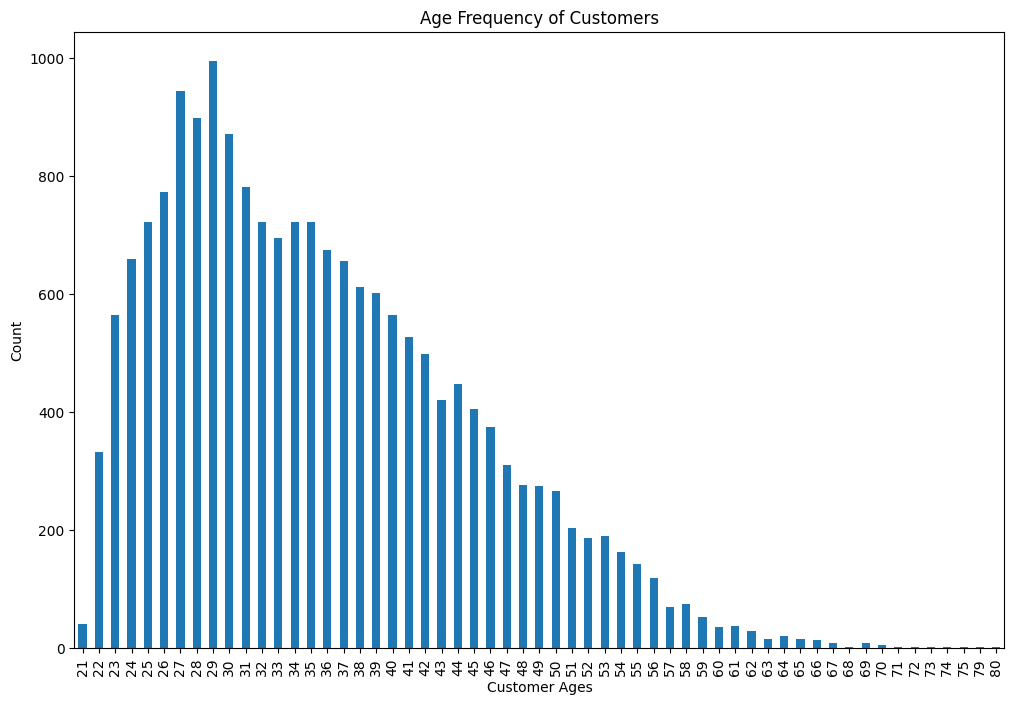

In [37]:
customer_ages = customers['AGE'].value_counts().sort_index()
customer_ages.plot(kind='bar', figsize=(12, 8))

plt.title("Age Frequency of Customers")
plt.xlabel("Customer Ages")
plt.ylabel("Count");

**Observation**

Information about the ages of the customers can be seen. We can see that there are not more old-age customers. We have more customers in the age ranging from 25-40.

In [38]:
customers['GENDER'].value_counts()

1    11598
0     7158
Name: GENDER, dtype: int64

**Observation**

We see that we have more number of females in our dataset then the male customers. It means that the more samples will be of female customers.

If there is a need to compare two columns, we can use the function `pd.crosstab(column1, column2)`. crosstab is used to compute the frequency table of factors by default. 

In [39]:
pd.crosstab(customers.GENDER, customers.RATING)

RATING,0,1
GENDER,,
0,5420,1738
1,9222,2376


What can we infer from this?

Since there is the difference between the good and the bad rating ratio. We can see that there are more good ratings then the bad ratings. But the Males has almost 75-25 ratio of giving the positive and negative rating. Females have almost 80-20 ratio. It means there is more positive feedback than the negative one.

Let's make our crosstab visual

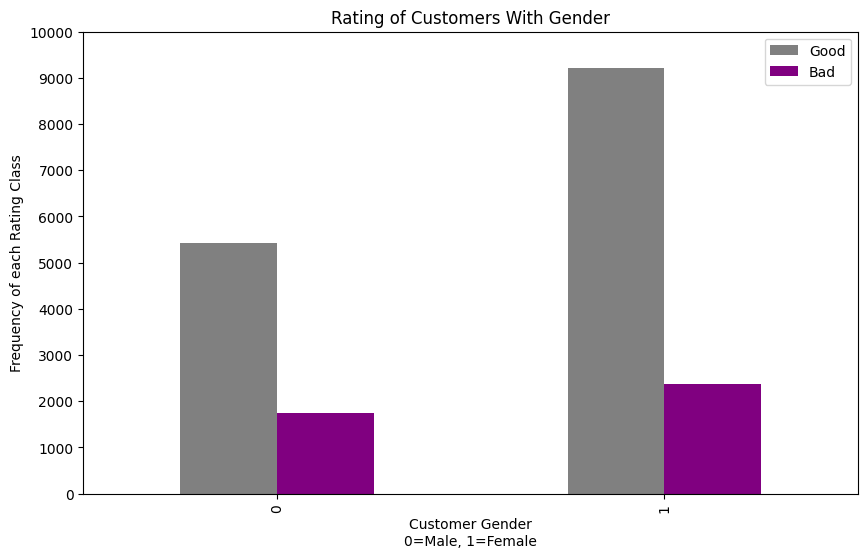

In [40]:
# Plotting the crosstab
pd.crosstab(customers.GENDER, customers.RATING).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["grey", "purple"]);

plt.legend(['Good', 'Bad']);
plt.title("Rating of Customers With Gender")
plt.xlabel("Customer Gender\n0=Male, 1=Female")
plt.ylabel("Frequency of each Rating Class")
plt.yticks(np.arange(0, 11000, 1000));

Now, we can do the similar analysis by identifying the marital status of the customers. In what age the customer would be married? Are there any customers who are single even in their grown age?

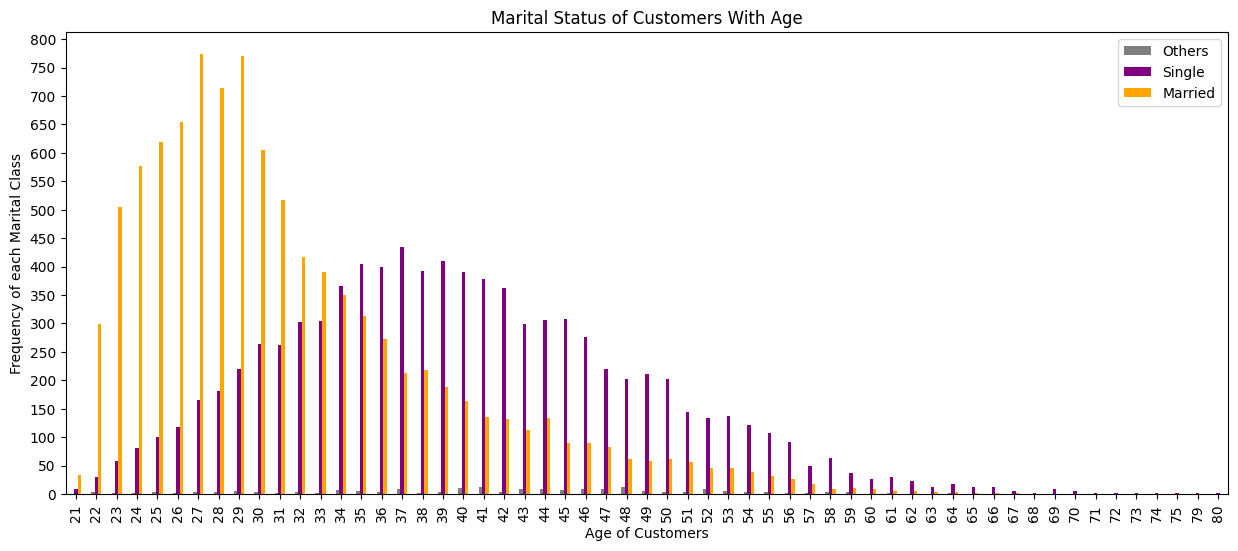

In [41]:
pd.crosstab(customers.AGE, customers.MARITAL).plot(kind="bar", 
                                                 figsize=(15,6), 
                                                 color=["grey", "purple", "orange"])

plt.legend(['Others', 'Single', 'Married']);
plt.title("Marital Status of Customers With Age")
plt.xlabel("Age of Customers")
plt.ylabel("Frequency of each Marital Class")
plt.yticks(np.arange(0, 850, 50));

What can we infer now?

We can clearly see that the customers upto age 33 have the dominancy of married status. But the graph shows that the customers after age 33 are more single than the married ones. Also, there is some portion of other customers as well. But why is that?
We can find and work based on the information we have from our visualization and do further processing if required. 

Now, let's check the average income of the customers based on their education. Who earn more? This will also help us getting the knowledge about the income we can get based on the education level.

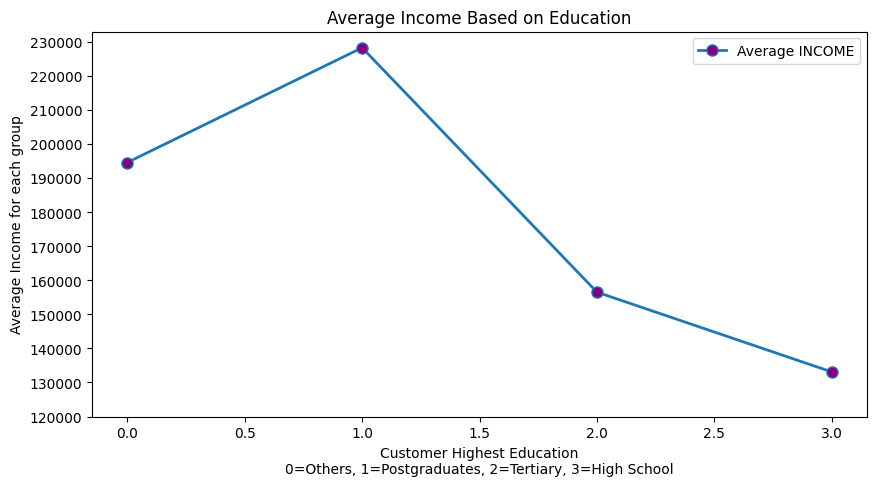

In [42]:
figure, axis = plt.subplots(figsize=(10, 5))

axis.plot(customers.groupby('EDUCATION')['INCOME'].mean(), marker='o', ms=8, mfc='purple', linewidth=2, label='Average INCOME')

# Setting the title, xlabel, ylabel, values on y-axis, and legend for the plot
axis.set_title("Average Income Based on Education")
axis.set_xlabel("Customer Highest Education\n0=Others, 1=Postgraduates, 2=Tertiary, 3=High School")
axis.set_ylabel("Average Income for each group")
axis.set_yticks(np.arange(120000, 240000, 10000))
axis.legend();

**Observation**

Wooh! this clearly reminds us that we are not going to get the high incomes in High School. This information clarifies the importance of education as well. 

The graph tells us that the highest income on average is of those customers who are `Postgraduates`. There is also  `Other` as Education level of the customers. This plot clarifies that the other class lies between the Tertiary and the Postgraduates w.r.t. income.

Now let's find the Customer repayment reflected status of each month

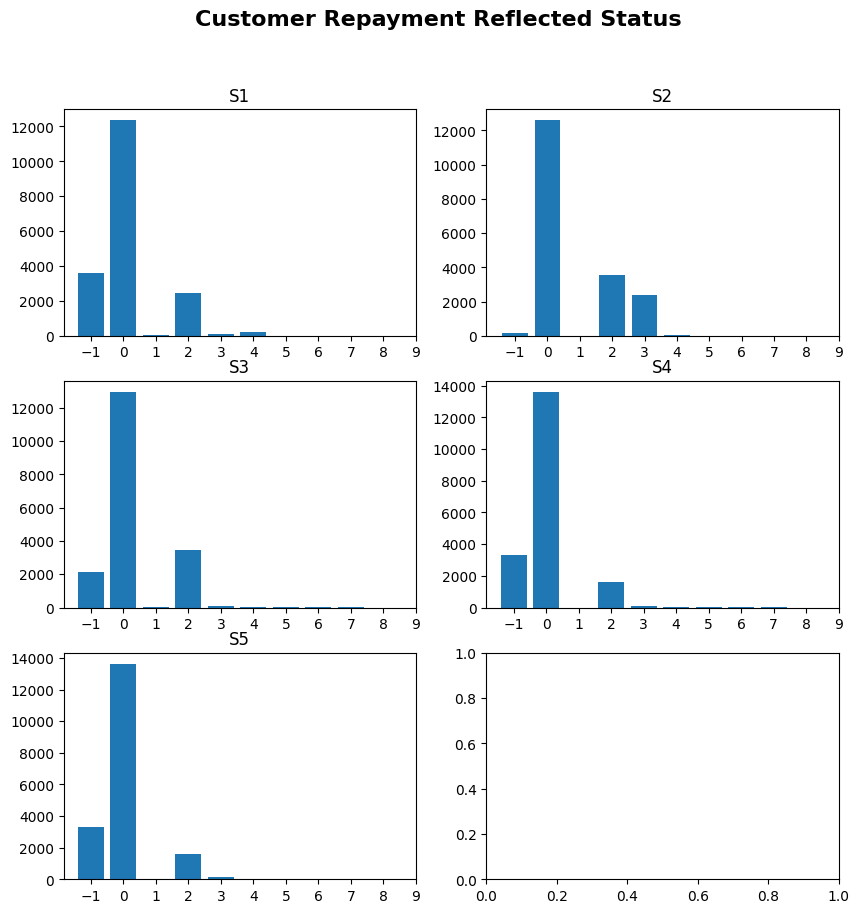

In [43]:
# Opening the figure with 3 rows and 2 columns. Each cell contain a subplot
fig, ((ax_0, ax_1), (ax_2, ax_3), (ax_4, ax_5)) = plt.subplots(figsize=(10, 10), nrows=3, ncols=2)

# Defining the axis to be used
axis = [ax_0, ax_1, ax_2, ax_3, ax_4]

# Using a for loop to perform the same plot on 5 different columns
for i in range(1, len(axis) + 1):
    # Making a bar plot which represent the frequency of each value
    axis[i-1].bar(customers['S'+str(i)].unique(), customers['S'+str(i)].value_counts())

    # Adding the extra useful information in each subplot 
    axis[i-1].set_title("S" + str(i))
    axis[i-1].set_xticks(np.arange(-1,10, 1))

# Setting the super title for the figure
fig.suptitle("Customer Repayment Reflected Status", fontsize=16, fontweight='bold');

**Observation**

Each subplot is providing the information about the repayment reflected status of each month for the customers. The figure shows that all the customers has the `minimum sum payment` status in maximum. It means that the most of the customers has the minimum payment due specified in the statement of Accounts that should be paid by the them by the Payment due date.

In most of the months, the customers with prompt payment are also greater in number.

### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our label.

We can do this by using the function called `df.corr()` which will create a [**correlation matrix**](https://datatofish.com/correlation-matrix-pandas/) for us, or we can say, a big table of numbers telling the relationship between each variable.

In [44]:
correlation_matrix = customers.corr()
correlation_matrix

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
ID,1.000000,0.049053,0.019115,0.048510,-0.024215,-0.035078,0.002404,-0.012450,0.029862,-0.021156,...,0.016897,0.018601,0.028841,0.010694,0.010086,0.007613,0.031518,0.002365,0.007603,0.011746
LIMIT,0.049053,1.000000,0.288451,0.993748,-0.175631,0.024134,-0.243592,-0.071713,0.141387,-0.234078,...,0.279476,0.283542,0.293590,0.301587,0.297727,0.171917,0.203142,0.202466,0.222811,0.212134
BALANCE,0.019115,0.288451,1.000000,0.286335,-0.022032,-0.034711,-0.010381,-0.016615,0.057948,0.118599,...,0.950885,0.901633,0.861524,0.823847,0.794155,0.110032,0.134365,0.162067,0.156033,0.202798
INCOME,0.048510,0.993748,0.286335,1.000000,-0.173741,0.023471,-0.241721,-0.070837,0.140523,-0.231589,...,0.277372,0.281617,0.291626,0.299452,0.296145,0.169917,0.199446,0.200370,0.222412,0.210771
RATING,-0.024215,-0.175631,-0.022032,-0.173741,1.000000,-0.044543,0.078907,-0.032827,0.019423,0.323195,...,-0.015495,-0.014766,-0.012417,-0.008279,-0.006809,-0.057883,-0.059636,-0.054990,-0.061667,-0.052689
GENDER,-0.035078,0.024134,-0.034711,0.023471,-0.044543,1.000000,0.009876,-0.024352,-0.091329,-0.057033,...,-0.033734,-0.028966,-0.026764,-0.022252,-0.020417,-0.000971,-0.010547,-0.005313,0.004136,-0.002080
EDUCATION,0.002404,-0.243592,-0.010381,-0.241721,0.078907,0.009876,1.000000,-0.163941,0.178314,0.115068,...,-0.011115,-0.012805,-0.020966,-0.025325,-0.019252,-0.037796,-0.061732,-0.047183,-0.054006,-0.050473
MARITAL,-0.012450,-0.071713,-0.016615,-0.070837,-0.032827,-0.024352,-0.163941,1.000000,-0.453641,-0.001380,...,-0.011988,-0.013231,-0.012207,-0.012538,-0.008205,-0.010349,-0.003364,-0.012802,0.008214,-0.004244
AGE,0.029862,0.141387,0.057948,0.140523,0.019423,-0.091329,0.178314,-0.453641,1.000000,-0.015089,...,0.057451,0.057922,0.058300,0.055342,0.050641,0.018293,0.024190,0.013670,0.018089,0.017475
S1,-0.021156,-0.234078,0.118599,-0.231589,0.323195,-0.057033,0.115068,-0.001380,-0.015089,1.000000,...,0.116328,0.111260,0.109025,0.115306,0.118311,-0.075250,-0.084888,-0.052759,-0.058790,-0.048801


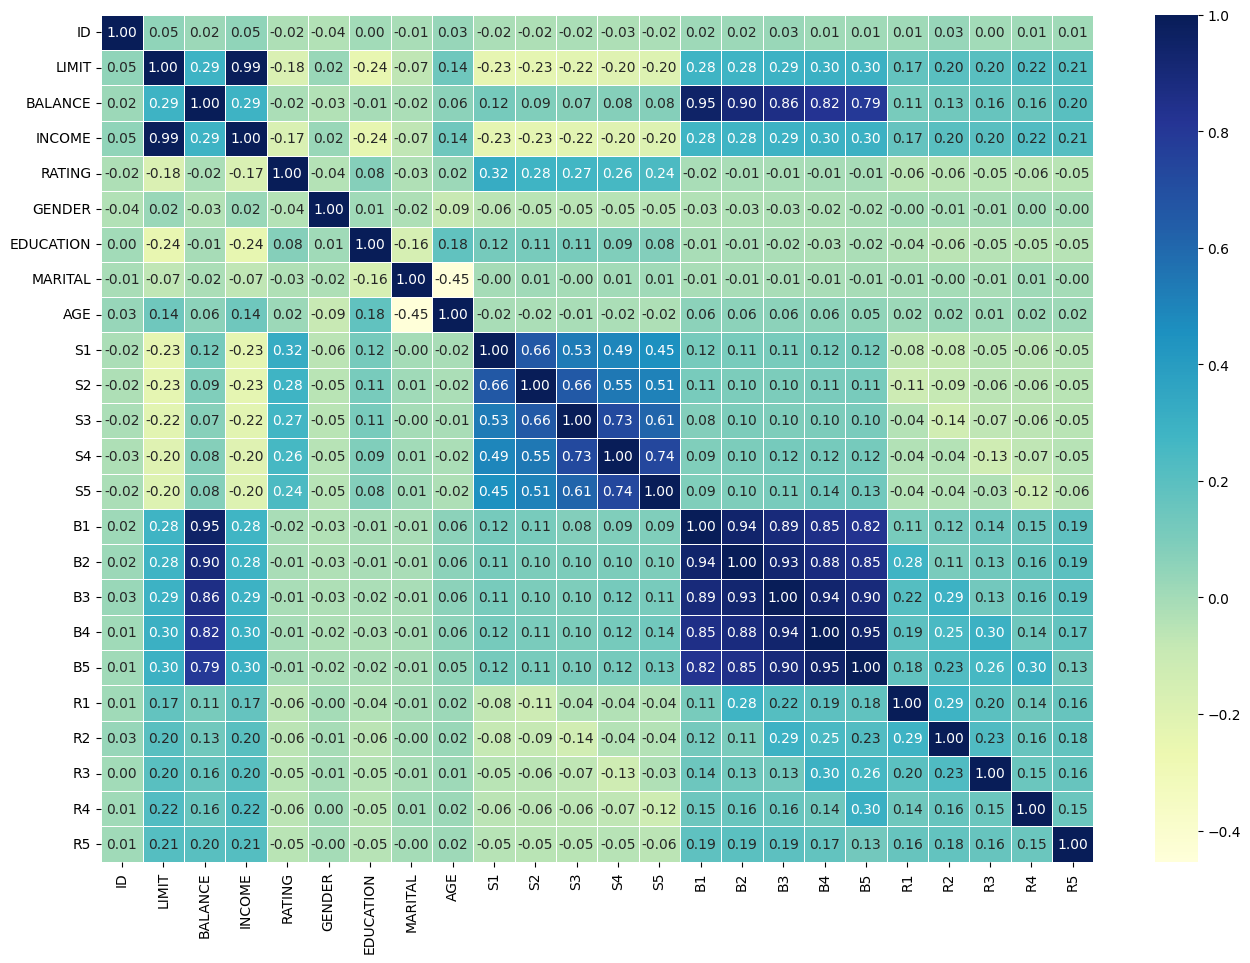

In [45]:
# Let's make it look a little prettier

correlation_matrix = customers.corr()
plt.figure(figsize=(16, 11))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

The visual representation of heatmap is more clear. Here, a higher positive value shows a positive correlation (direct) and a higher negative value shows a negative correlation (opposite).

---

## Modelling

Let's Perform linear regression modelling to predict the variable, B1, explaining the approach taken, including any further data pre-processing.

There is some further preprocessing which needs to be performed before the modelling.

## Normalizing the Data

We have some variables in the data which needs to be transformed for the better performance of the model. Normalization is used when there are different scaled features. The updated values are scaled between the the range of 0 and 1. Let's use some variables of our dataset which have wide range of values:

In [46]:
# Making a list of variable which have wide range of values
variable_list = ['LIMIT', 'BALANCE', 'INCOME', 'AGE', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']

# Extracting those variables from original dataframe to seperate them
variables_to_normalize = customers[variable_list]
# Keep track of column names (can be used in future)
normalized_columns = list(variables_to_normalize.columns.values)
# Keep track of row numbers (can be used in future)
normalized_rows = list(variables_to_normalize.index)

In [47]:
# See the extracted columns
variables_to_normalize

,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.000,235822,30,0,0,0,0,0,0,0,0,0,0
1,260000,10928.050,278481,31,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397.850,431993,51,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695.300,22368,58,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68.250,166900,42,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,220000,33065.900,225862,39,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,150000,294.525,149966,43,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,30000,623.875,30327,37,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,80000,0.000,94607,41,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


Let's normalize the variables we have selected from our dataset

In [48]:
# perform normalization using sklearn.preprocessing.normalize on the selected columns
normalized_array = normalize(variables_to_normalize)

In [49]:
# The array returned after the normalization process can be stored as the dataframe with the rows and columns stored above
scaled_customers = pd.DataFrame(normalized_array, columns=normalized_columns, index = normalized_rows)
# Let's see the scaled customers
scaled_customers

,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,0.665037,0.000000,0.746811,0.000095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.652824,0.027439,0.699228,0.000078,0.135772,0.116522,0.097607,0.078650,0.060339,0.005022,0.005022,0.005022,0.005022,0.180782
2,0.440855,0.072077,0.476115,0.000056,0.378684,0.388485,0.373429,0.312222,0.204213,0.016532,0.015430,0.012675,0.008817,0.007715
3,0.363271,0.067120,0.406282,0.001053,0.389971,0.003633,0.000000,0.522020,0.023522,0.000000,0.000000,0.522020,0.028426,0.000000
4,0.732874,0.000278,0.679537,0.000171,0.005130,0.002435,0.008371,0.017508,0.007337,0.002435,0.008371,0.017508,0.007337,0.015028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,0.504003,0.075751,0.517433,0.000089,0.441724,0.477348,0.201610,0.071562,0.036609,0.045818,0.011461,0.006980,0.011455,0.002291
18765,0.705490,0.001385,0.705330,0.000202,0.008598,0.016471,0.042231,0.024410,0.000000,0.016584,0.042320,0.000607,0.000000,0.000000
18766,0.500805,0.010415,0.506263,0.000618,0.056023,0.046041,0.348527,0.343585,0.323136,0.000000,0.367257,0.070113,0.033387,0.051750
18767,0.424821,0.000000,0.502388,0.000218,0.416213,0.405194,0.280244,0.062953,0.259906,0.018103,0.006255,0.010228,0.281253,0.009580


We have to keep our dataframe with the original (without transformation) and the normalized variables to predict the target variable `B1`. If we concatenate the scaled and the original customers dataset, the columns will be merged. So, we have to change the name of the transformed variables to identify them.

In [50]:
# Adding a prefix to mark the change in columns
scaled_customers = scaled_customers.add_prefix('normalized_')

In [51]:
# Concatenating the original and the scaled customers to predict the target variable
updated_customers = pd.concat([customers, scaled_customers], axis=1)
# Viewing the updated customers
updated_customers

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,normalized_B1,normalized_B2,normalized_B3,normalized_B4,normalized_B5,normalized_R1,normalized_R2,normalized_R3,normalized_R4,normalized_R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,0.135772,0.116522,0.097607,0.078650,0.060339,0.005022,0.005022,0.005022,0.005022,0.180782
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,0.378684,0.388485,0.373429,0.312222,0.204213,0.016532,0.015430,0.012675,0.008817,0.007715
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,0.389971,0.003633,0.000000,0.522020,0.023522,0.000000,0.000000,0.522020,0.028426,0.000000
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,0.005130,0.002435,0.008371,0.017508,0.007337,0.002435,0.008371,0.017508,0.007337,0.015028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,0.441724,0.477348,0.201610,0.071562,0.036609,0.045818,0.011461,0.006980,0.011455,0.002291
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,0.008598,0.016471,0.042231,0.024410,0.000000,0.016584,0.042320,0.000607,0.000000,0.000000
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,0.056023,0.046041,0.348527,0.343585,0.323136,0.000000,0.367257,0.070113,0.033387,0.051750
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,0.416213,0.405194,0.280244,0.062953,0.259906,0.018103,0.006255,0.010228,0.281253,0.009580


**Observation**

Now we have a dataframe populated with the transformed and the original values of the columns. This preprocessing will help the model to predict the values in a better way then predicting the target variable with the large ranged values. Let's train and test the model now.

In [52]:
# Seperating the features and the label in X and y
X = updated_customers.drop('B1', axis=1)
y = updated_customers['B1']

# Using the train_test_split function to split data with specifying 30% size of test data
# Random state is specified for the reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

# Instantiating a model
model = LinearRegression()

# Training a model (on training portion)
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make the predictions
y_preds = model.predict(X_test)

Check the predicted and the true values

In [54]:
y_preds[:10]

array([43012.78005395,  3019.61951759, 14238.51725628,  3825.8128222 ,
       17646.41488946, 24726.69580305, 31655.50948047,  1326.91407981,
        1228.81701627, 35370.29787173])

In [55]:
np.array(y_test[:10])

array([45060,  2587, 14275,  3831, 17295, 14300, 29803,   390,    36,
       35422], dtype=int64)

**Observation**

Since the model is trying to predict the quantity, so there is some slight difference between the true values and the model predicted values.

In [56]:
print(f"The accuracy of the model is: {model.score(X_test, y_test)*100:.2f}%")

The accuracy of the model is: 97.74%


## Explaining the Approach Taken

The normalization is done on the variables with the large range of values. These type of variables causes difficulty in model to predict the target variable. When the preprocessing step is done on these variables, they are scaled into the shorter range. Hence, it becomes easy for a model to predict the target variables. So, we see the good efficiency of the model with this type of approach.`

What if we predict the target variable on our original customers dataset without normalizing the variables?

In [57]:
X = customers.drop('B1', axis=1)
y = customers['B1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print(f"The accuracy of the model is: {model.score(X_test, y_test)*100:.2f}%")

The accuracy of the model is: 95.61%


**Observation**

We see that the model has lagged it's performance while predicting the large range values.

---

A good idea is to State the linear regression equation and explain key insights from the results obtained before

## Linear Regression Equation

In `linear regression`, we have X and Y (`dependent` and `independent` variables respectively). By using linear regression, we determine the behavior of dependent variable on the basis of independent variable. There could be the positive, negative or variable relationship between these variables. 

Usually, there are many observations in the problem to be examined. Linear regression defines the line that best describes the observations. We can call that line, a regression line. 

The `linear regression equation` is similar to the equation of line in the algebra. The equation of line is:

y = mx + c

Similarly, in linear regression we have equation:

$ \hat{Y} = a_{0} + a_{1}x $

Where,

$ a_{0} $ = y-intercept, $ a_{1} $ = slope

`y-intercept` is the point where a function line passes the y-axis. We can find it by using it's formula. 

We usually refer `slope` as rise over run formula. We can find the slope and the y-intercept to determine the dependent variable for linear regression equation.


## Key Insights from the results obtained

There are different observations that we can see from the result obtained from our modelling:

* Linear Regression model fits and evaluates the model to predict the quantity.
* There is a need of data transformation to scale the values with the large range of data. 
* It is easy for the model to find patterns in the data with the small range, and normalization, and standardization helps in scaling the data in efficient way.
* Better results were obtained when there were variables in the dataset which had not large range values.
* There was 30% of the shuffled data on which the model was tested, and the linear model well suited on the current problem.
* When the linear regression model predicted the results, it predicted them by the linear approximation
* The linear regression model achieved more than 95% of accuracy while predicting the target variable.


---